#### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [3]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
# y.pop('price')
y = pd.DataFrame(boston['target'], columns = ['price'])

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
##### n_components=2, learning_rate=250, random_state=42.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [26]:
X_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

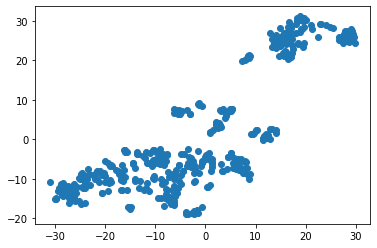

In [29]:
%matplotlib inline
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

#### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.



In [32]:
from sklearn.cluster import KMeans

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


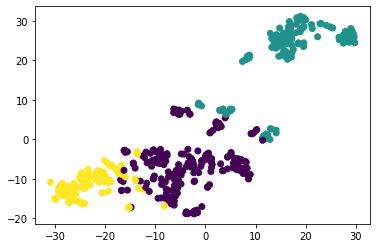

In [47]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
# labels_train
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [82]:
print(f'Среднее значение price, нулевой класс: {y_train[ labels_train == 0 ].price.mean()}')
print(f'Среднее значение price, первый класс: {y_train[ labels_train == 1 ].price.mean()}')
print(f'Среднее значение price, второй класс: {y_train[ labels_train == 2 ].price.mean()}')

Среднее значение price, нулевой класс: 24.971204188481675
Среднее значение price, первый класс: 16.1796875
Среднее значение price, второй класс: 27.87411764705882


In [83]:
print(f'Среднее значение параметра \'CRIM\', нулевой класс: {X_train[labels_train == 0 ].CRIM.mean()}')
print(f'Среднее значение параметра \'CRIM\', первый класс: {X_train[labels_train == 1 ].CRIM.mean()}')
print(f'Среднее значение параметра \'CRIM\', второй класс: {X_train[labels_train == 2 ].CRIM.mean()}')

Среднее значение параметра 'CRIM', нулевой класс: 0.42098554973821994
Среднее значение параметра 'CRIM', первый класс: 10.7152190625
Среднее значение параметра 'CRIM', второй класс: 0.0721184705882353


#### Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [97]:
labels_test = kmeans.predict(X_test_scaled)

# y_test.shape
# labels_test.shape
# y_test
# labels_test

print(f'Среднее значение price (тестовый сет), нулевой класс: {y_test[ labels_test == 0 ].price.mean()}')
print(f'Среднее значение price (тестовый сет), первый класс: {y_test[ labels_test == 1 ].price.mean()}')
print(f'Среднее значение price (тестовый сет), второй класс: {y_test[ labels_test == 2 ].price.mean()}')

Среднее значение price (тестовый сет), нулевой класс: 21.860784313725492
Среднее значение price (тестовый сет), первый класс: 16.43714285714286
Среднее значение price (тестовый сет), второй класс: 31.35


In [98]:
print(f'Среднее значение параметра \'CRIM\' (тестовый сет), нулевой класс: {X_test[labels_test == 0 ].CRIM.mean()}')
print(f'Среднее значение параметра \'CRIM\' (тестовый сет), первый класс: {X_test[labels_test == 1 ].CRIM.mean()}')
print(f'Среднее значение параметра \'CRIM\' (тестовый сет), второй класс: {X_test[labels_test == 2 ].CRIM.mean()}')

Среднее значение параметра 'CRIM' (тестовый сет), нулевой класс: 0.2660788235294118
Среднее значение параметра 'CRIM' (тестовый сет), первый класс: 10.165531142857143
Среднее значение параметра 'CRIM' (тестовый сет), второй класс: 0.06206
